In [35]:
from langgraph.graph import StateGraph
from typing import List, TypedDict

In [36]:
class AgentState(TypedDict):
    values : List[int]
    name : str
    operation : str
    result : str
    

In [37]:
def process_multiplication(state: AgentState) -> AgentState:
    """Compute sum or product based on the operation (+ or *)."""

    operation = state.get("operation")
    values = state.get("values")

    # Validate operation
    if operation not in ("+", "*"):
        raise ValueError(
            f"Invalid operation '{operation}'. Allowed operations are '+' or '*'."
        )

    # Validate values
    if not isinstance(values, list) or not all(isinstance(v, (int, float)) for v in values):
        raise TypeError("`values` must be a list of numbers.")

    # Compute results
    if operation == "+":
        result = sum(values)
        state["result"] = f"Hey There, {state['name']}! Your product sum is {result}"
    else:  # operation == "*"
        result = math.prod(values)
        state["result"] = f"Hey There, {state['name']}! Your product costs {result}"

    return state

In [38]:
# creatinga  graph of one node
graph = StateGraph(AgentState)

graph.add_node("multiplier", process_multiplication)
graph.set_entry_point("multiplier")
graph.set_finish_point("multiplier")

# compile the graph
# always compile the graph in some variable
app = graph.compile()

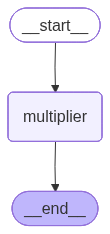

In [39]:
# view the graph
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [41]:
# invoke the graph
result = app.invoke(
    {
        "values" : [1,2,3,4],
        "name" : "Shree",
        "operation" : "+"
    }
)

In [42]:
print(result)

{'values': [1, 2, 3, 4], 'name': 'Shree', 'operation': '+', 'result': 'Hey There, Shree! Your product sum is 10'}
